ФИО:

In [ ]:
print('Тыщенко Илья')

Тыщенко Илья


## Задание 1. HTTP-запросы, ответы и погода

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API. Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests

latitude_and_longitude = input().split(', ')

url = 'https://api.open-meteo.com/v1/forecast'

weather_params = {
    'latitude': latitude_and_longitude[0],
    'longitude': latitude_and_longitude[1],
    'current':  'temperature_2m,precipitation,wind_speed_10m'
}

response = requests.get(url, params=weather_params)

weather = response.json()

time = weather['current']['time'].split('T')
date = time[0].split("-")

print('Сегодня', date[2]+'.'+date[1], 'Погода:', int(weather['current']['temperature_2m']), '◦С, Кол-во осадков:', weather['current']['precipitation'], 'мм, Скорость ветра:', weather['current']['wind_speed_10m'], 'м/с' )

56.50, 60.35
Сегодня 29.10 Погода: -1 ◦С, Кол-во осадков: 0.0 мм, Скорость ветра: 5.3 м/с


## Задание 2. HTTP-запросы, ответы и покемоны


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
import requests

url_top_20 = 'https://pokeapi.co/api/v2/pokemon/'

response = requests.get(url_top_20)

print('Топ-20 Покемонов:')
for i in range(len(response.json()['results'])):
  print('- ' + response.json()['results'][i]['name'])

name_pokemon = input('Имя покемона: ')

url_pokemon = 'https://pokeapi.co/api/v2/pokemon/'

response = requests.get(url_pokemon + name_pokemon)

type_pokemon = response.json()['types'][0]['type']['name']
height_pokemon = 	response.json()['height']
weight_pokemon = 	response.json()['weight']
abilities = ''

for i in range(len(response.json()['abilities'])):
  abilities += response.json()['abilities'][i]['ability']['name'] + ' '

print('============================================')
print('Имя:', name_pokemon)
print('Тип:', type_pokemon)
print('Вес:', weight_pokemon, 'hectograms')
print('Рост:', height_pokemon, 'decimetres')
print('Способности:', abilities)
print('============================================')


Топ-20 Покемонов:
- bulbasaur
- ivysaur
- venusaur
- charmander
- charmeleon
- charizard
- squirtle
- wartortle
- blastoise
- caterpie
- metapod
- butterfree
- weedle
- kakuna
- beedrill
- pidgey
- pidgeotto
- pidgeot
- rattata
- raticate
Имя покемона: pidgeotto
Имя: pidgeotto
Тип: normal
Вес: 300 hectograms
Рост: 11 decimetres
Способности: keen-eye tangled-feet big-pecks 


## Задание 3. HTTP-запросы, ответы и посты

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests
import json

def post_list_json(url):
  response = requests.get(url)
  return(response.json())

def post_id_json(url):
  id = input('Введите id поста: ')
  param = {'id': id}
  response = requests.get(url, params=param)
  return(response.json())

def new_post_id_json(json_id):
  return(json.dumps(json_id, indent=4))

url = 'https://jsonplaceholder.typicode.com/posts/'

print(new_post_id_json(post_id_json(url)))

Введите id поста: 56
[
    {
        "userId": 6,
        "id": 56,
        "title": "qui et at rerum necessitatibus",
        "body": "aut est omnis dolores\nneque rerum quod ea rerum velit pariatur beatae excepturi\net provident voluptas corrupti\ncorporis harum reprehenderit dolores eligendi"
    }
]


## Задание 4. HTTP-запросы, ответы и работа с постами

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests
import json

def new_post(url):
  title = input('Заголовок: ')
  body = input('Содержимое поста: ')
  userId = input('ID пользователя: ')
  param = {
      'title': title,
      'body': body,
      'userId': userId
  }
  response = requests.post(url, data=param)
  print(response.json())

def change_post(url):
  id = input('ID поста: ')
  title = input('Новый заголовок: ')
  body = input('Новое содержимое поста: ')
  param = {
      'title': title,
      'body': body,
  }
  response = requests.put(url + id, data=param)
  print(response.json())

def delepe_post(url):
  id = input('ID поста: ')
  response = requests.delete(url + id)
  print('Status-code:', response.status_code)

url = 'https://jsonplaceholder.typicode.com/posts/'

new_post(url)
change_post(url)
delepe_post(url)

Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
{'title': 'Новый пост', 'body': 'Тут должно находиться содержимое нового поста...', 'userId': '10', 'id': 101}
ID поста: 3
Новый заголовок: Супер Новый пост 
Новое содержимое поста: Новое содержимое
{'title': 'Супер Новый пост ', 'body': 'Новое содержимое', 'id': 3}
ID поста: 5
Status-code: 200


## Задание 5. HTTP-запросы, ответы и пёсики

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


1. affenpinscher
2. african
3. airedale
4. akita
5. appenzeller
6. australian
7. bakharwal
8. basenji
9. beagle
10. bluetick
11. borzoi
12. bouvier
13. boxer
14. brabancon
15. briard
16. buhund
17. bulldog
18. bullterrier
19. cattledog
20. cavapoo
21. chihuahua
22. chippiparai
23. chow
24. clumber
25. cockapoo
26. collie
27. coonhound
28. corgi
29. cotondetulear
30. dachshund
31. dalmatian
32. dane
33. danish
34. deerhound
35. dhole
36. dingo
37. doberman
38. elkhound
39. entlebucher
40. eskimo
41. finnish
42. frise
43. gaddi
44. germanshepherd
45. greyhound
46. groenendael
47. havanese
48. hound
49. husky
50. keeshond
51. kelpie
52. kombai
53. komondor
54. kuvasz
55. labradoodle
56. labrador
57. leonberg
58. lhasa
59. malamute
60. malinois
61. maltese
62. mastiff
63. mexicanhairless
64. mix
65. mountain
66. mudhol
67. newfoundland
68. otterhound
69. ovcharka
70. papillon
71. pariah
72. pekinese
73. pembroke
74. pinscher
75. pitbull
76. pointer
77. pomeranian
78. poodle
79. pug
80. pug

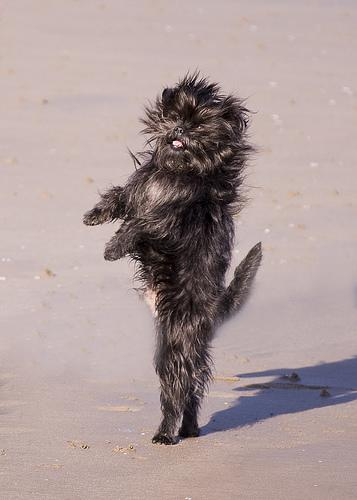

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io

def all_dogs(url_list_all):
  response = requests.get(url_list_all)
  count = 1
  for key in response.json()['message'].keys():
    print(str(count) + '.', key)
    count += 1

list_url = 'https://dog.ceo/api/breeds/list/all'
url = "https://dog.ceo/api/breed/affenpinscher/images/random"


response = requests.get(url)
# response_all = requests.get(list_url)

# count = 1
# for key in response_all.json()['message'].keys():
#   print(str(count) + '.', key)
#   count += 1

# print(response_all.json()['message'].keys())
# print(response.json())


all_dogs(list_url)


if response.status_code == 200:
      image_url = response.json()['message']
      # print(image_url)

res = requests.get(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)